In [52]:
import hdbscan
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as m
import numpy as np
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from pandas import DataFrame as df
from IPython.display import clear_output

from sklearn import cluster, datasets

import seaborn as sns

import GPy
import GPclust

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
def import_data():
    dataset = pd.read_csv('../data/DP.csv',usecols=[27],engine='python',skipfooter=None)
    return dataset
def mean_absolute_percentage_error(y_true, y_pred): 

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())



[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  1  1  1 -1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0 -1  1  1  1  1  1  1  1  0  0  0  1  1  1  2  2 -1 -1 -1  2  2 -1  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3 -1  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4 -1 -1  4  2  2 -1  2  2 -1  1  2  2  2  2  2  2  2  2  2  2
  2  2  2  2

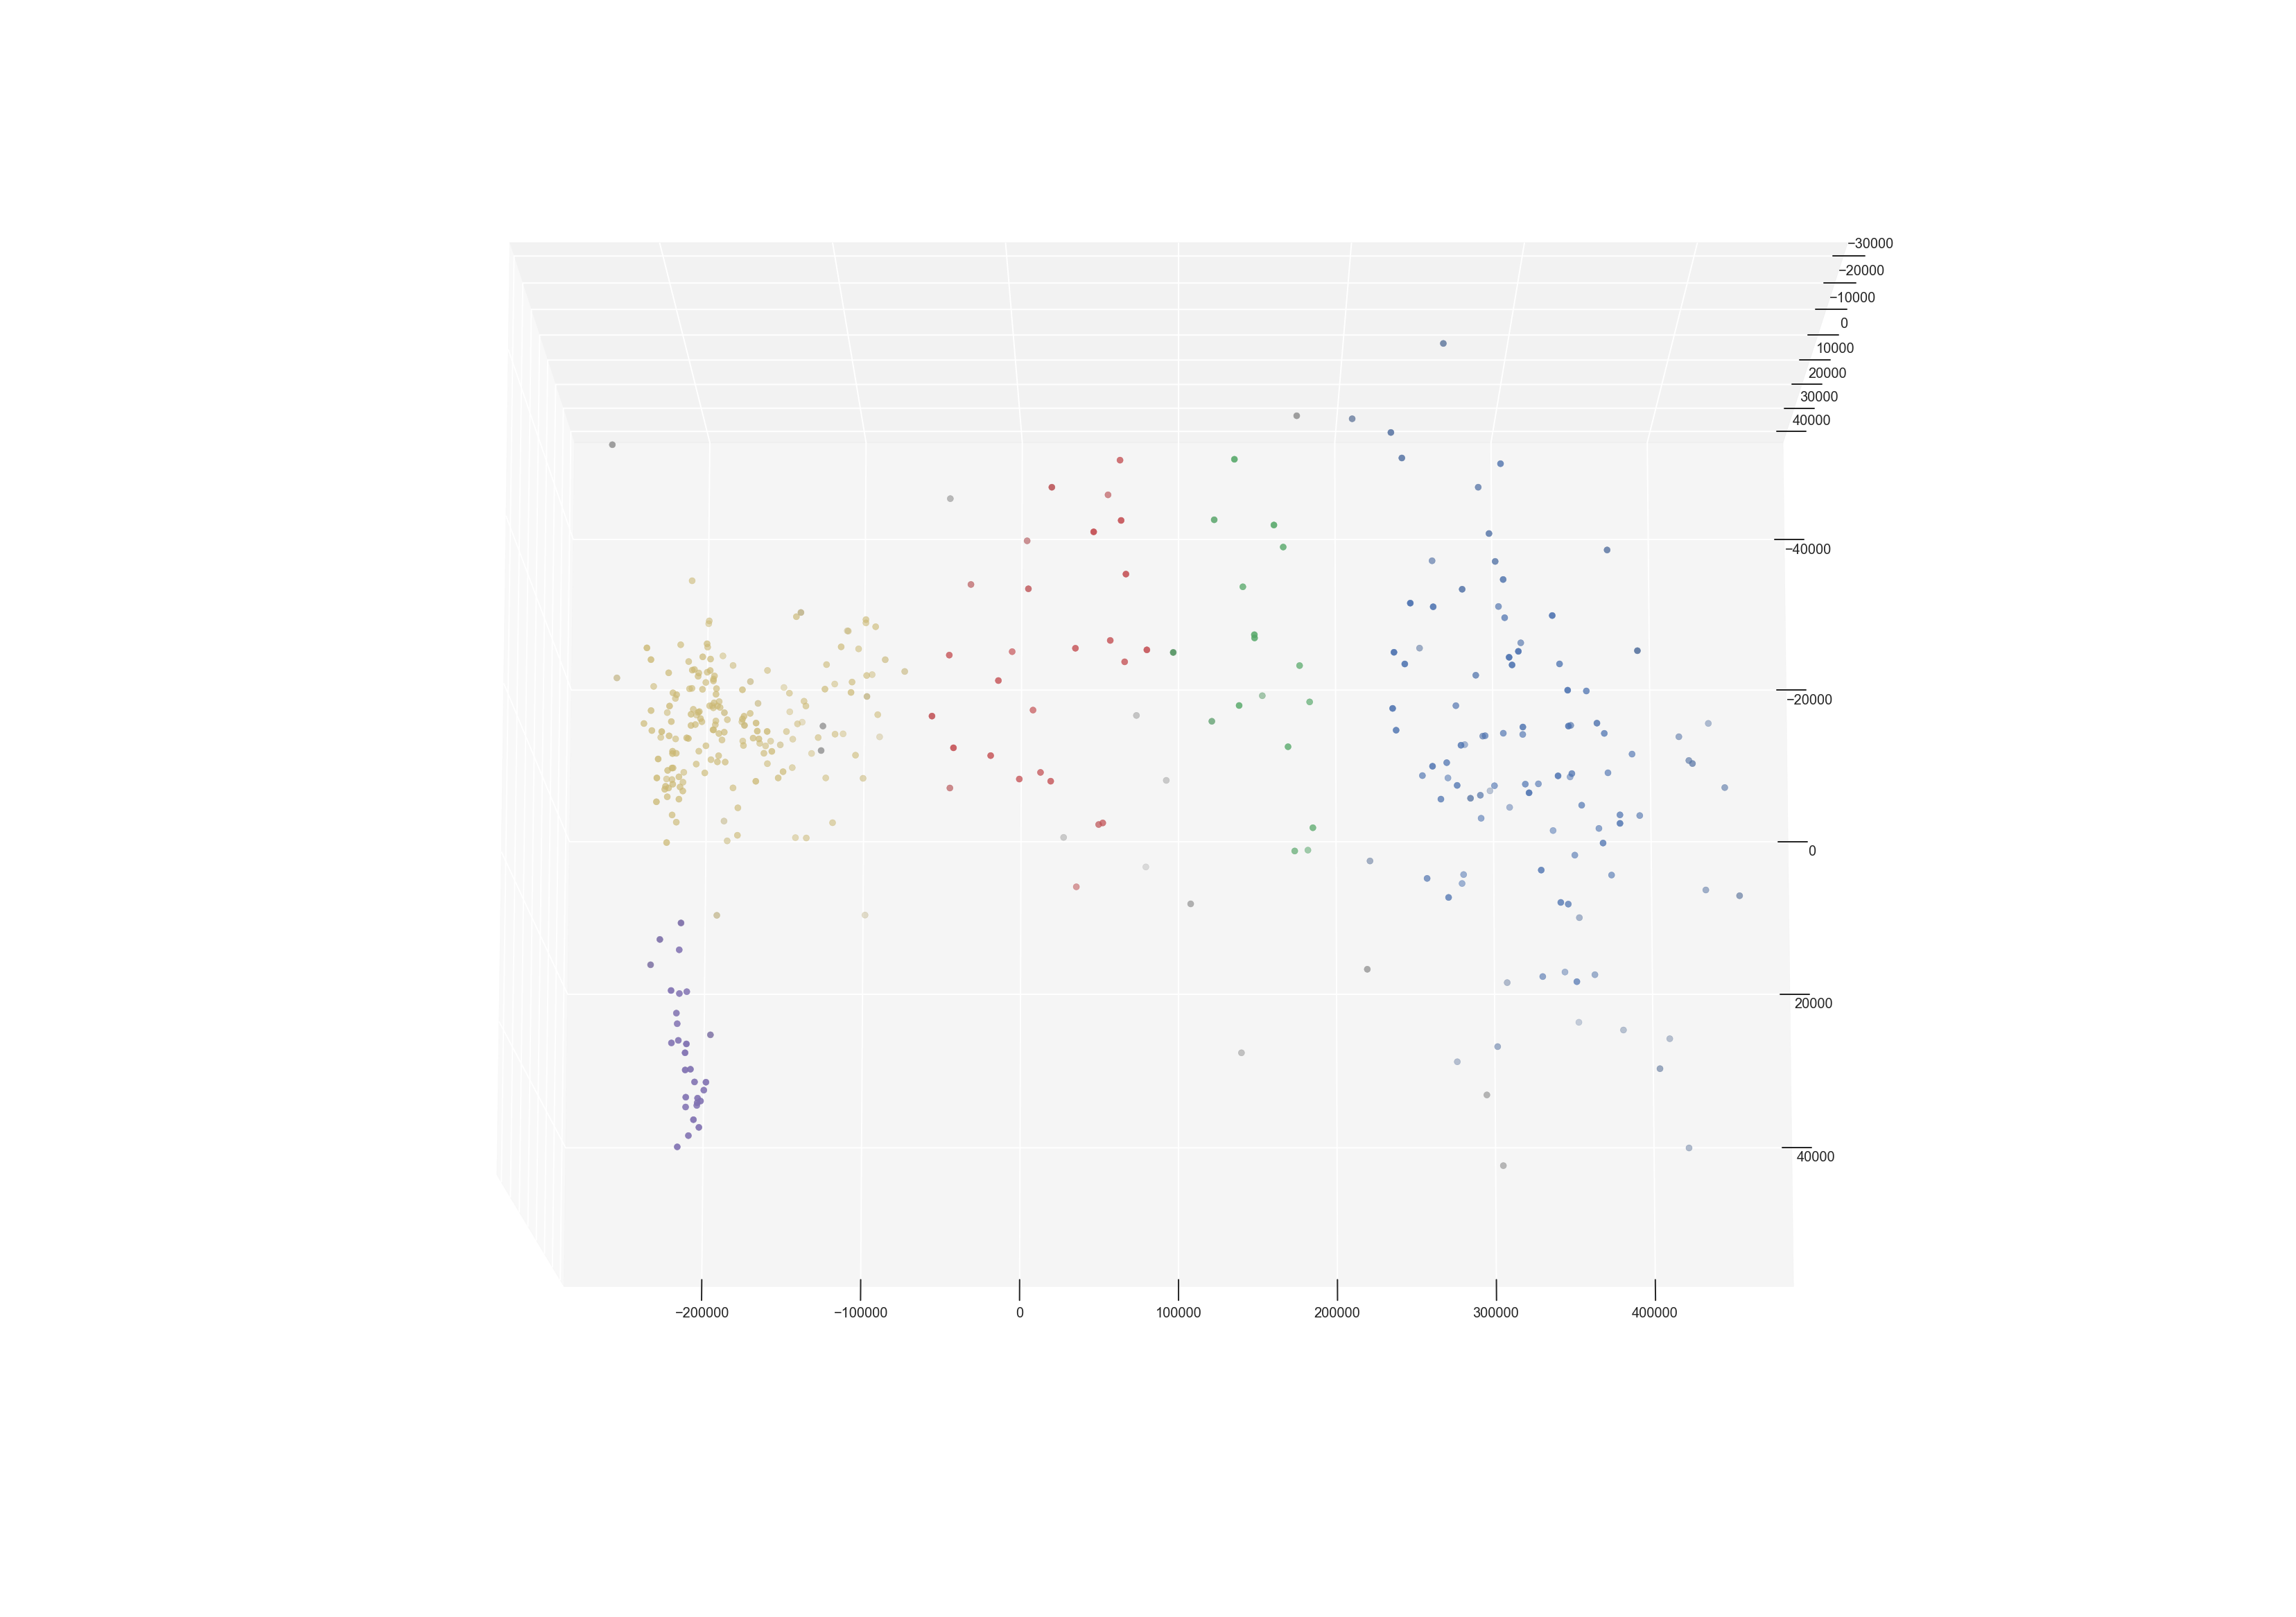

In [62]:
data = import_data()
data= np.array(data)
data= data.reshape(-1,24)

daydataHDBScan= df(data)
daydataHDBScan.index= pd.date_range('2014-1-1', periods=365, freq='D')

HDBScanClusters = hdbscan.HDBSCAN(min_cluster_size=3).fit(daydataHDBScan)
pal = sns.color_palette('deep', 6)
colors = [sns.desaturate(pal[col], sat) for col, sat in zip(HDBScanClusters.labels_, 
                                                            HDBScanClusters.probabilities_)]
pca= PCA(n_components=3)
pca.fit(daydataHDBScan)
data_pca =  pca.transform(daydataHDBScan)

# clusterer[[45,46,47]]= clusterer[0]
# clusterer[[84,85,86]]= clusterer[87]
pdHDBScanClusters= pd.DataFrame(HDBScanClusters.labels_,index=daydataHDBScan.index)
print(HDBScanClusters.labels_)
fig = plt.figure(1, figsize=(24,16),facecolor='white')


ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=280, azim=90,facecolor='white')


ax.scatter(data_pca[:,0],data_pca[:,1],data_pca[:,2],cmap=plt.cm.spectral,c= colors)

plt.show()

[5 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 1 1
 1 1 1 1 5 5 1 1 5 5 5 1 1 1 1 1 1 1 5 5 5 1 5 5 1 5 5 1 1 1 1 1 1 1 5 5 5
 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 2 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 0 4
 4 0 0 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 4 4 4 4 4 4 3 3 3 3 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 2 2 2 2 1 1 5 5 5 5 5 5 1 1 1 5 5 5 1 1 1 1 1 1 1 1 1 5 5 5 5]


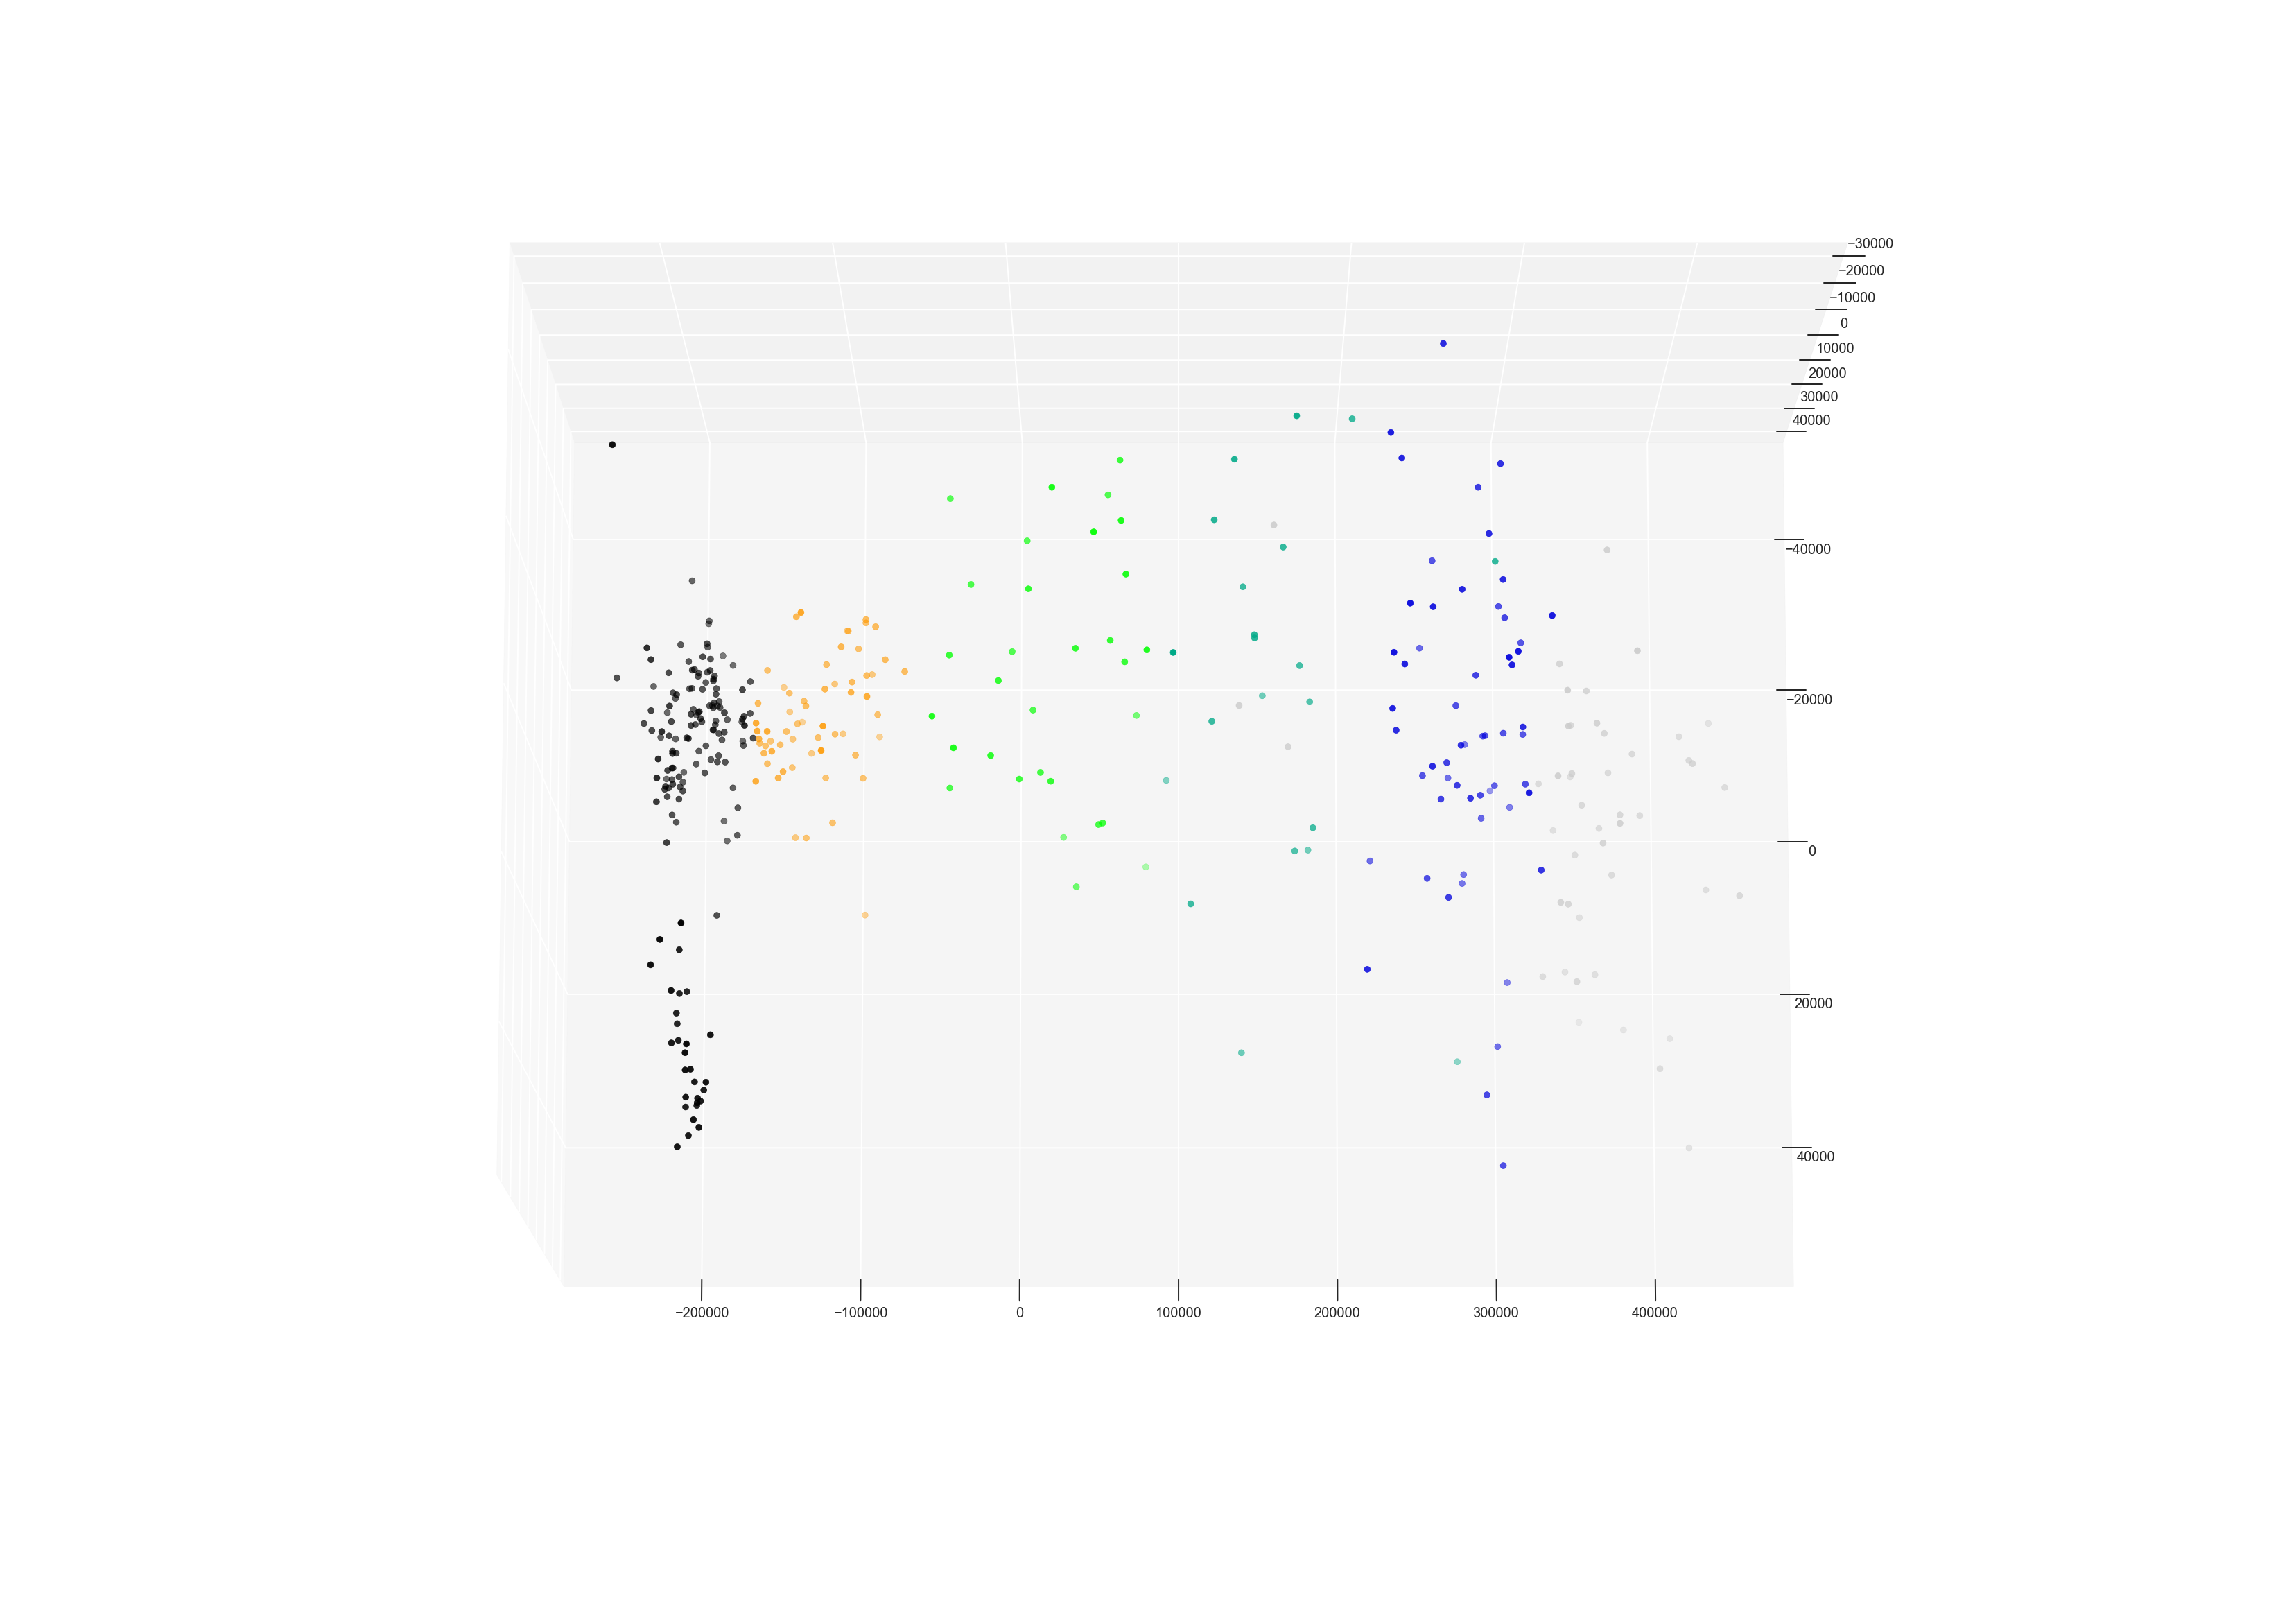

In [57]:
daydataKMeans= df(data)



KmeansClusters = cluster.KMeans(n_clusters=6).fit_predict(daydataKMeans)
pca= PCA(n_components=3)
pca.fit(daydataKMeans)
data_pca =  pca.transform(daydataKMeans)

KmeansClusters[[45,46,47]]= KmeansClusters[0]
KmeansClusters[[84,85,86]]= KmeansClusters[87]
# pdClusters= pd.DataFrame(clusters,index=daydata.index)
print(KmeansClusters)
fig = plt.figure(1, figsize=(24, 16))

ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=280, azim=90,facecolor='white')

ax.scatter(data_pca[:,0],data_pca[:,1],data_pca[:,2],cmap=plt.cm.spectral,c=KmeansClusters)

plt.show()




In [111]:
daydataGaussianProcess= df(data)
daydataGaussianProcess.index= pd.date_range('2014-1-1', periods=365, freq='D')

x=np.array(range(0,24)).reshape(-1,1)
y=np.array(daydataGaussianProcess)

pca= PCA(n_components=3)
pca.fit(daydataGaussianProcess)
data_pca =  pca.transform(daydataGaussianProcess)

k_underlying = GPy.kern.Matern52(input_dim=1, variance=1.0, lengthscale=12.)
k_corruption = GPy.kern.Matern52(input_dim=1, variance=0.1, lengthscale=12.) + GPy.kern.White(1, variance=0.01)

m = GPclust.MOHGP(x, k_underlying, k_corruption, y, K=5, prior_Z='DP', alpha=1.0)
m.hyperparam_opt_interval = 100 # how often to optimize the hyperparameters

m.hyperparam_opt_args['messages'] = False # turn off the printing of the optimization
m.optimize()
m.systematic_splits(verbose=False)

('\riteration 1 bound=-4.46788590263e+12 grad=1.01615672568e+21, beta=0',)
('\riteration 2 bound=-4.0082982291e+12 grad=0.0, beta=0.0',)
vb converged (gtol)
('\riteration 3 bound=-1651098761.13 grad=0.0, beta=0.0',)
vb converged (gtol)
('\riteration 4 bound=-241219341.397 grad=0.0, beta=0.0',)
vb converged (gtol)
('\riteration 5 bound=-33316378.7076 grad=0.0, beta=0.0',)
vb converged (gtol)
('\riteration 6 bound=-3163732.11311 grad=0.0, beta=0.0',)
vb converged (gtol)
('\riteration 8 bound=-2497235.30365 grad=7.84945174027e-13, beta=inf',)
vb converged (gtol)
('\riteration 9 bound=-2279559.98053 grad=3.27677875432e-37, beta=0.0',)
vb converged (gtol)
('\riteration 10 bound=-1850899.66485 grad=3.22369514522e-135, beta=0.0',)
vb converged (gtol)
('\riteration 12 bound=-1511052.51148 grad=2.18787966194e-39, beta=1.03805757967e+96',)
vb converged (gtol)
('\riteration 13 bound=-1498081.74544 grad=8195.7338693, beta=0.0',)
('\riteration 14 bound=-1498081.74544 grad=2.48237909129e-29, beta=5.

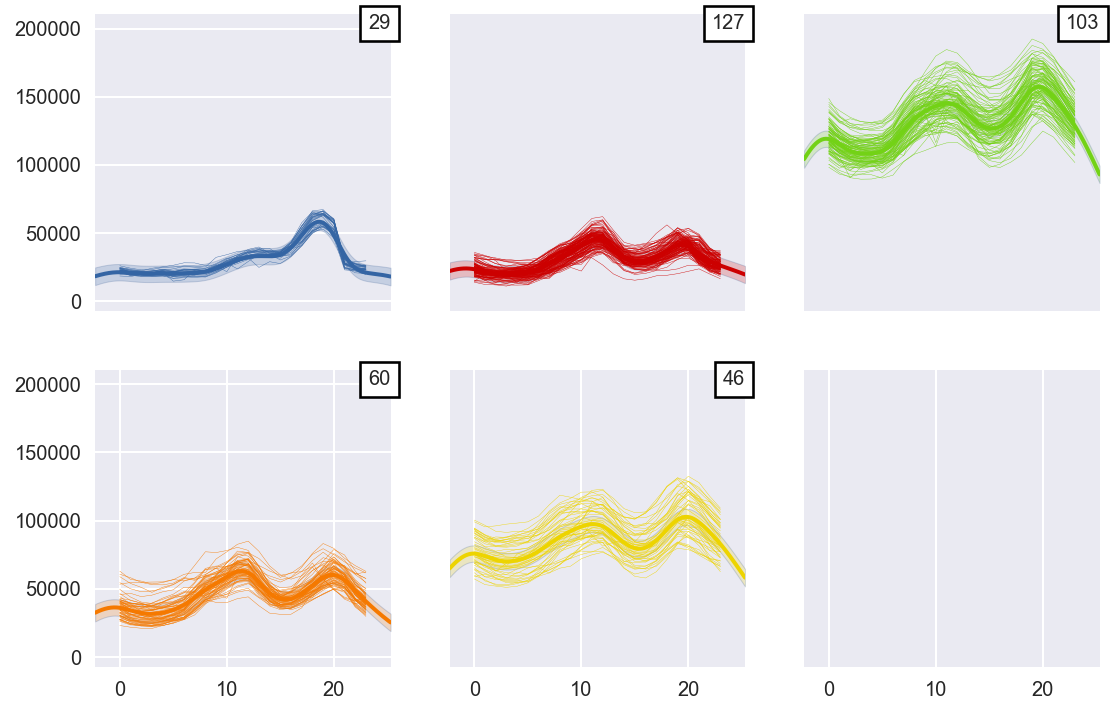

In [112]:
plt.figure(figsize=(9, 6))
m.plot(on_subplots=True, colour=True, newfig=False)
plt.show()



[[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 4 4 4 4 4 4 4 4 2 2 2 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3
  3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 3 1 3
  3 1 1 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 4 4 4 4 4
  4 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]]


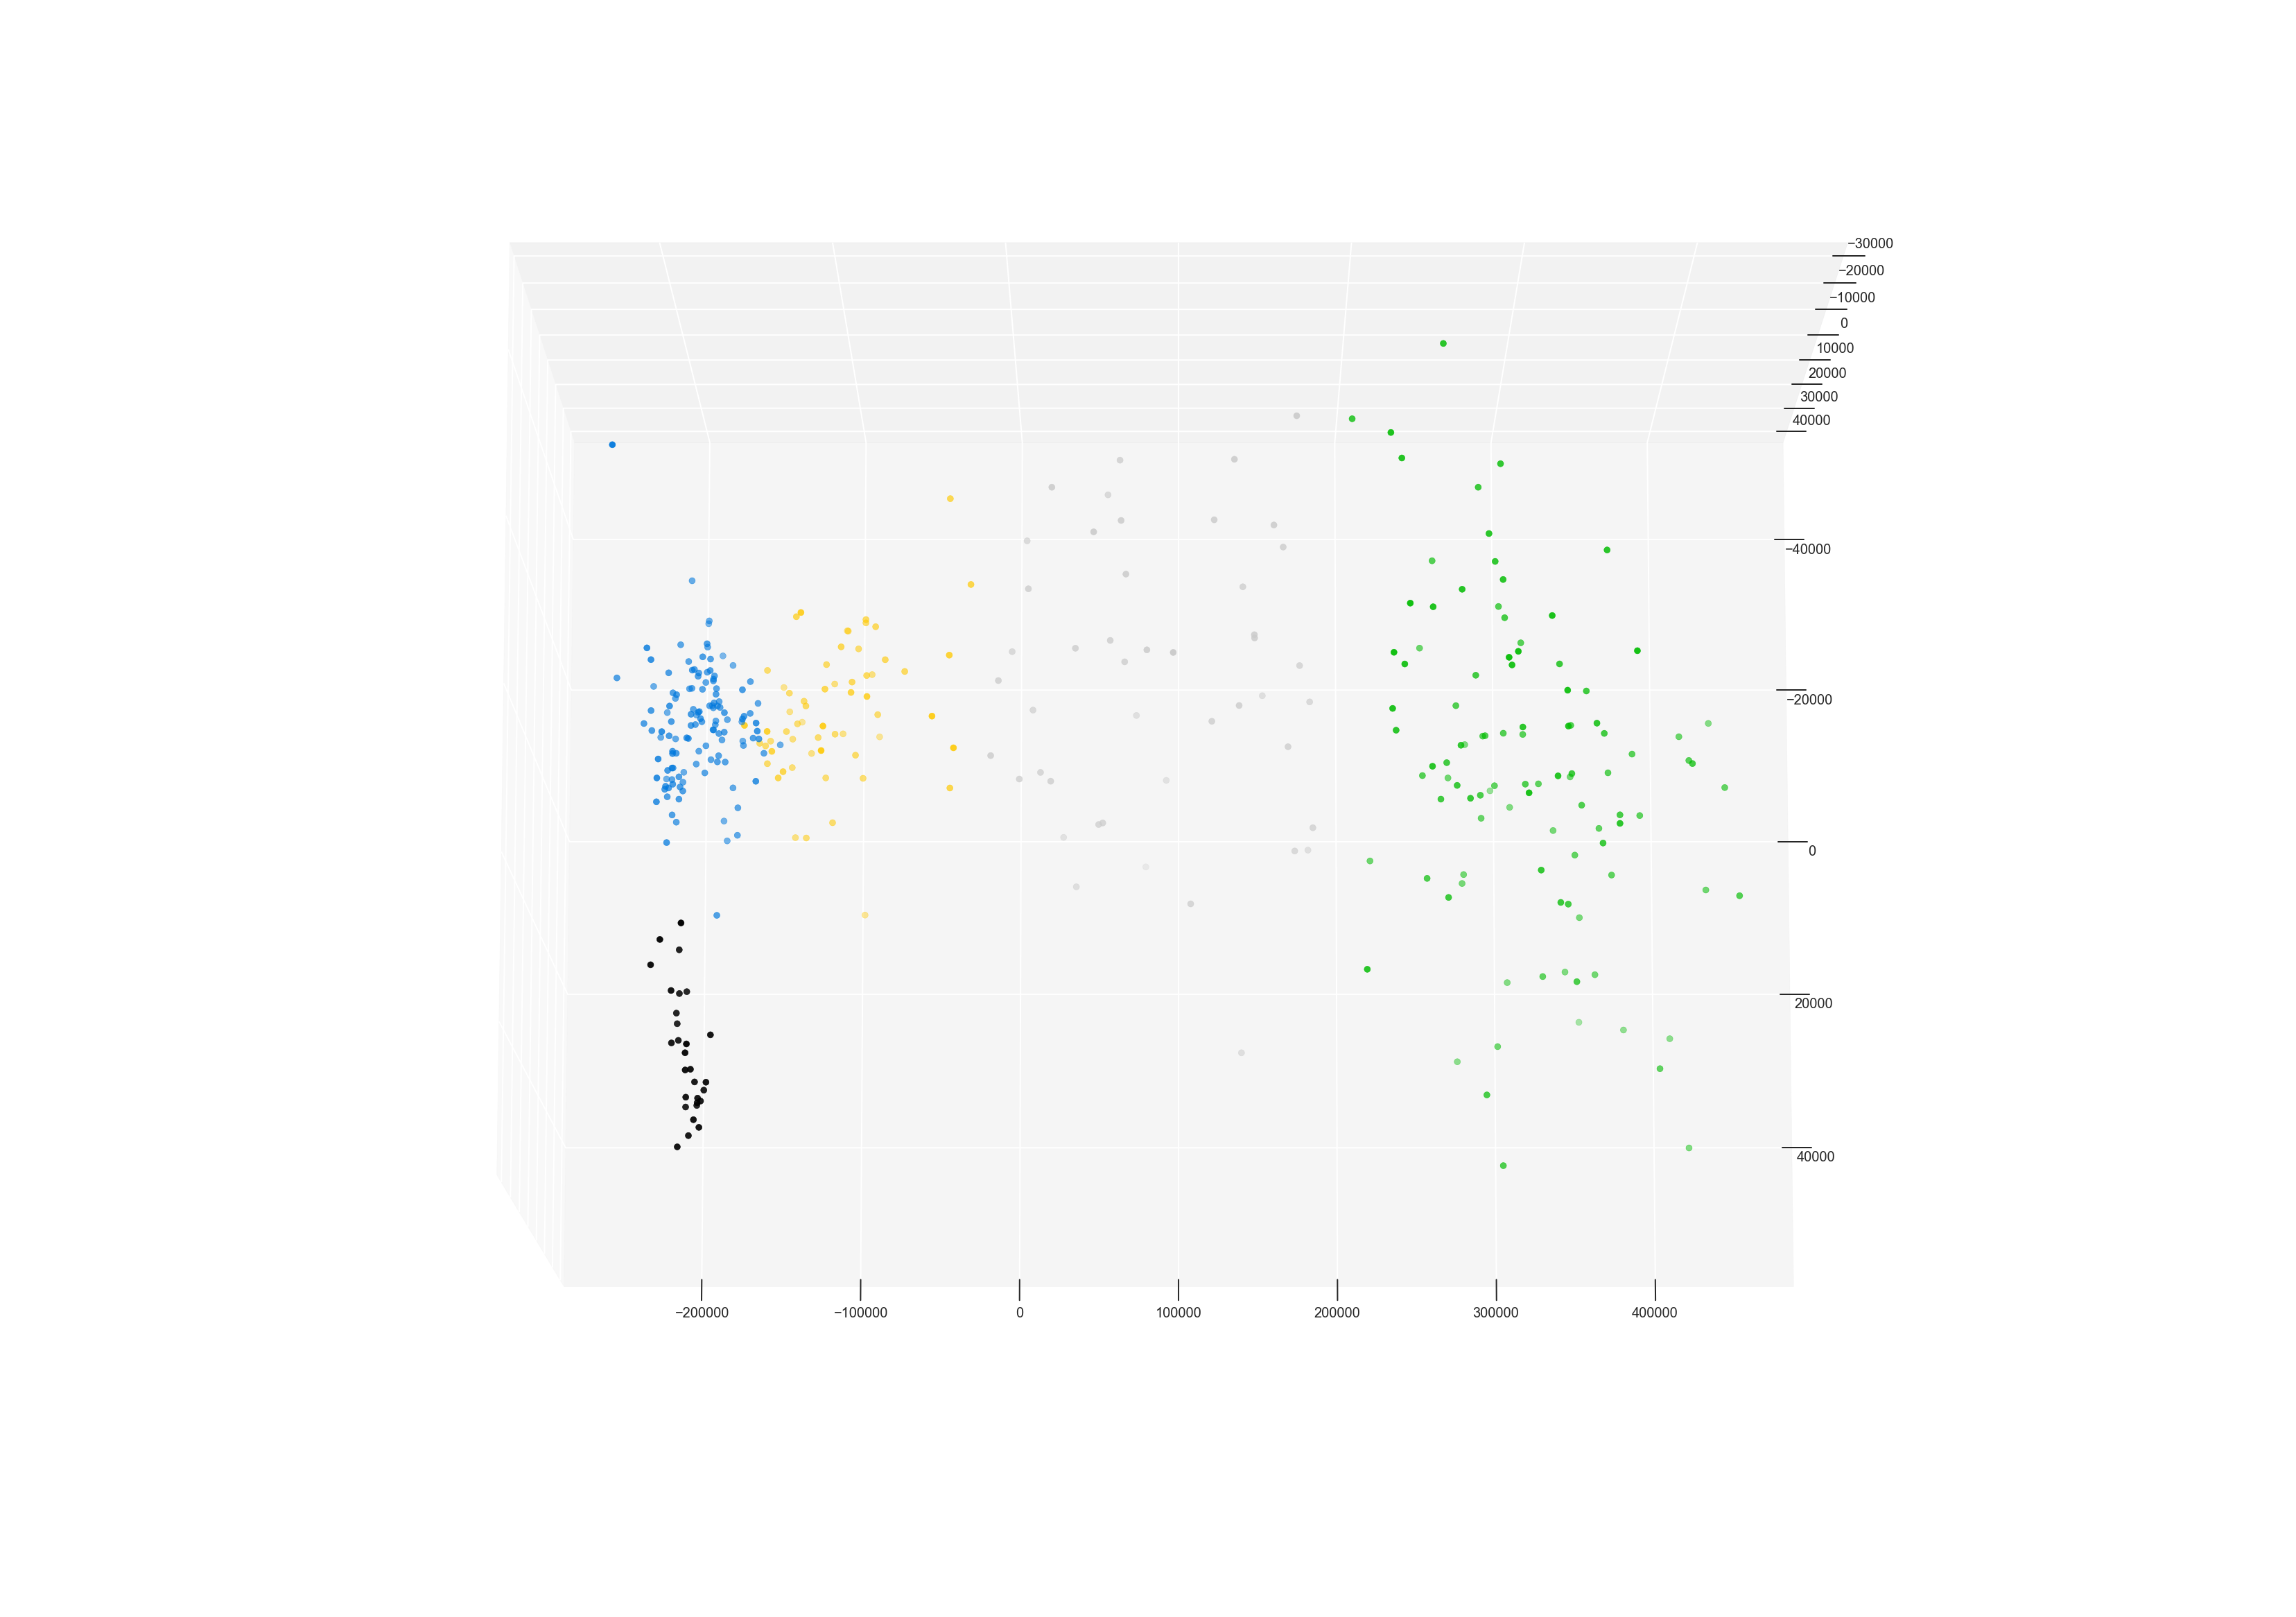

In [115]:
GPClusters = np.empty((m.Hgrad.shape[0],1),dtype=int)
for x in range(0,m.Hgrad.shape[0]):
    GPClusters[x,0] = m.Hgrad[x].argmin()

GPClusters = GPClusters.reshape(-1,GPClusters.size)
print(GPClusters.reshape(-1,GPClusters.size))


fig = plt.figure(1, figsize=(24,16))


ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=280, azim=90,facecolor='white')


ax.scatter(data_pca[:,0],data_pca[:,1],data_pca[:,2],cmap=plt.cm.spectral,c=GPClusters)

plt.show()


In [51]:
print(GPClusters)
temp= np.array(HDBScanClusters.labels_)
temp[HDBScanClusters.labels_< 0] = 5

print
print
print(temp)
print
print
temp2= np.array(KmeansClusters)
temp2[KmeansClusters==0]= 10
temp2[KmeansClusters==4]= 0
temp2[temp2==10]= 4
print(temp2)

np.savetxt('../data/GP_5_Clusters',GPClusters,delimiter=',')
np.savetxt('../data/HDBScan_6_Clusters',temp,delimiter=',')
np.savetxt('../data/KMeans_6_Clusters',temp2,delimiter=',')

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 5 5 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 5 5 5 5 5 5 5 5 0 0 5 5 5 5 5 3 3 5 5 5 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1
  1 4 4 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4
  4 4 4 4 4 4 4 1 1 1 1 1 3 3 5 3 5 5 5 5 5 3 3 5 5 5 5 3 3 3 3 3 3 3 3 3 3
  5 5 5 5 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 5 0 0 0 0 1 1 1 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 5 1 1 1 1 1 1 1 0 0 0 1 1 1 2 2 5 5 5 2 2 5 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  4.  0.  0.  0.  0.  0.  0.  0.  4.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  4.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  4.  4.  4.  1.  1.  4.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  4.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2

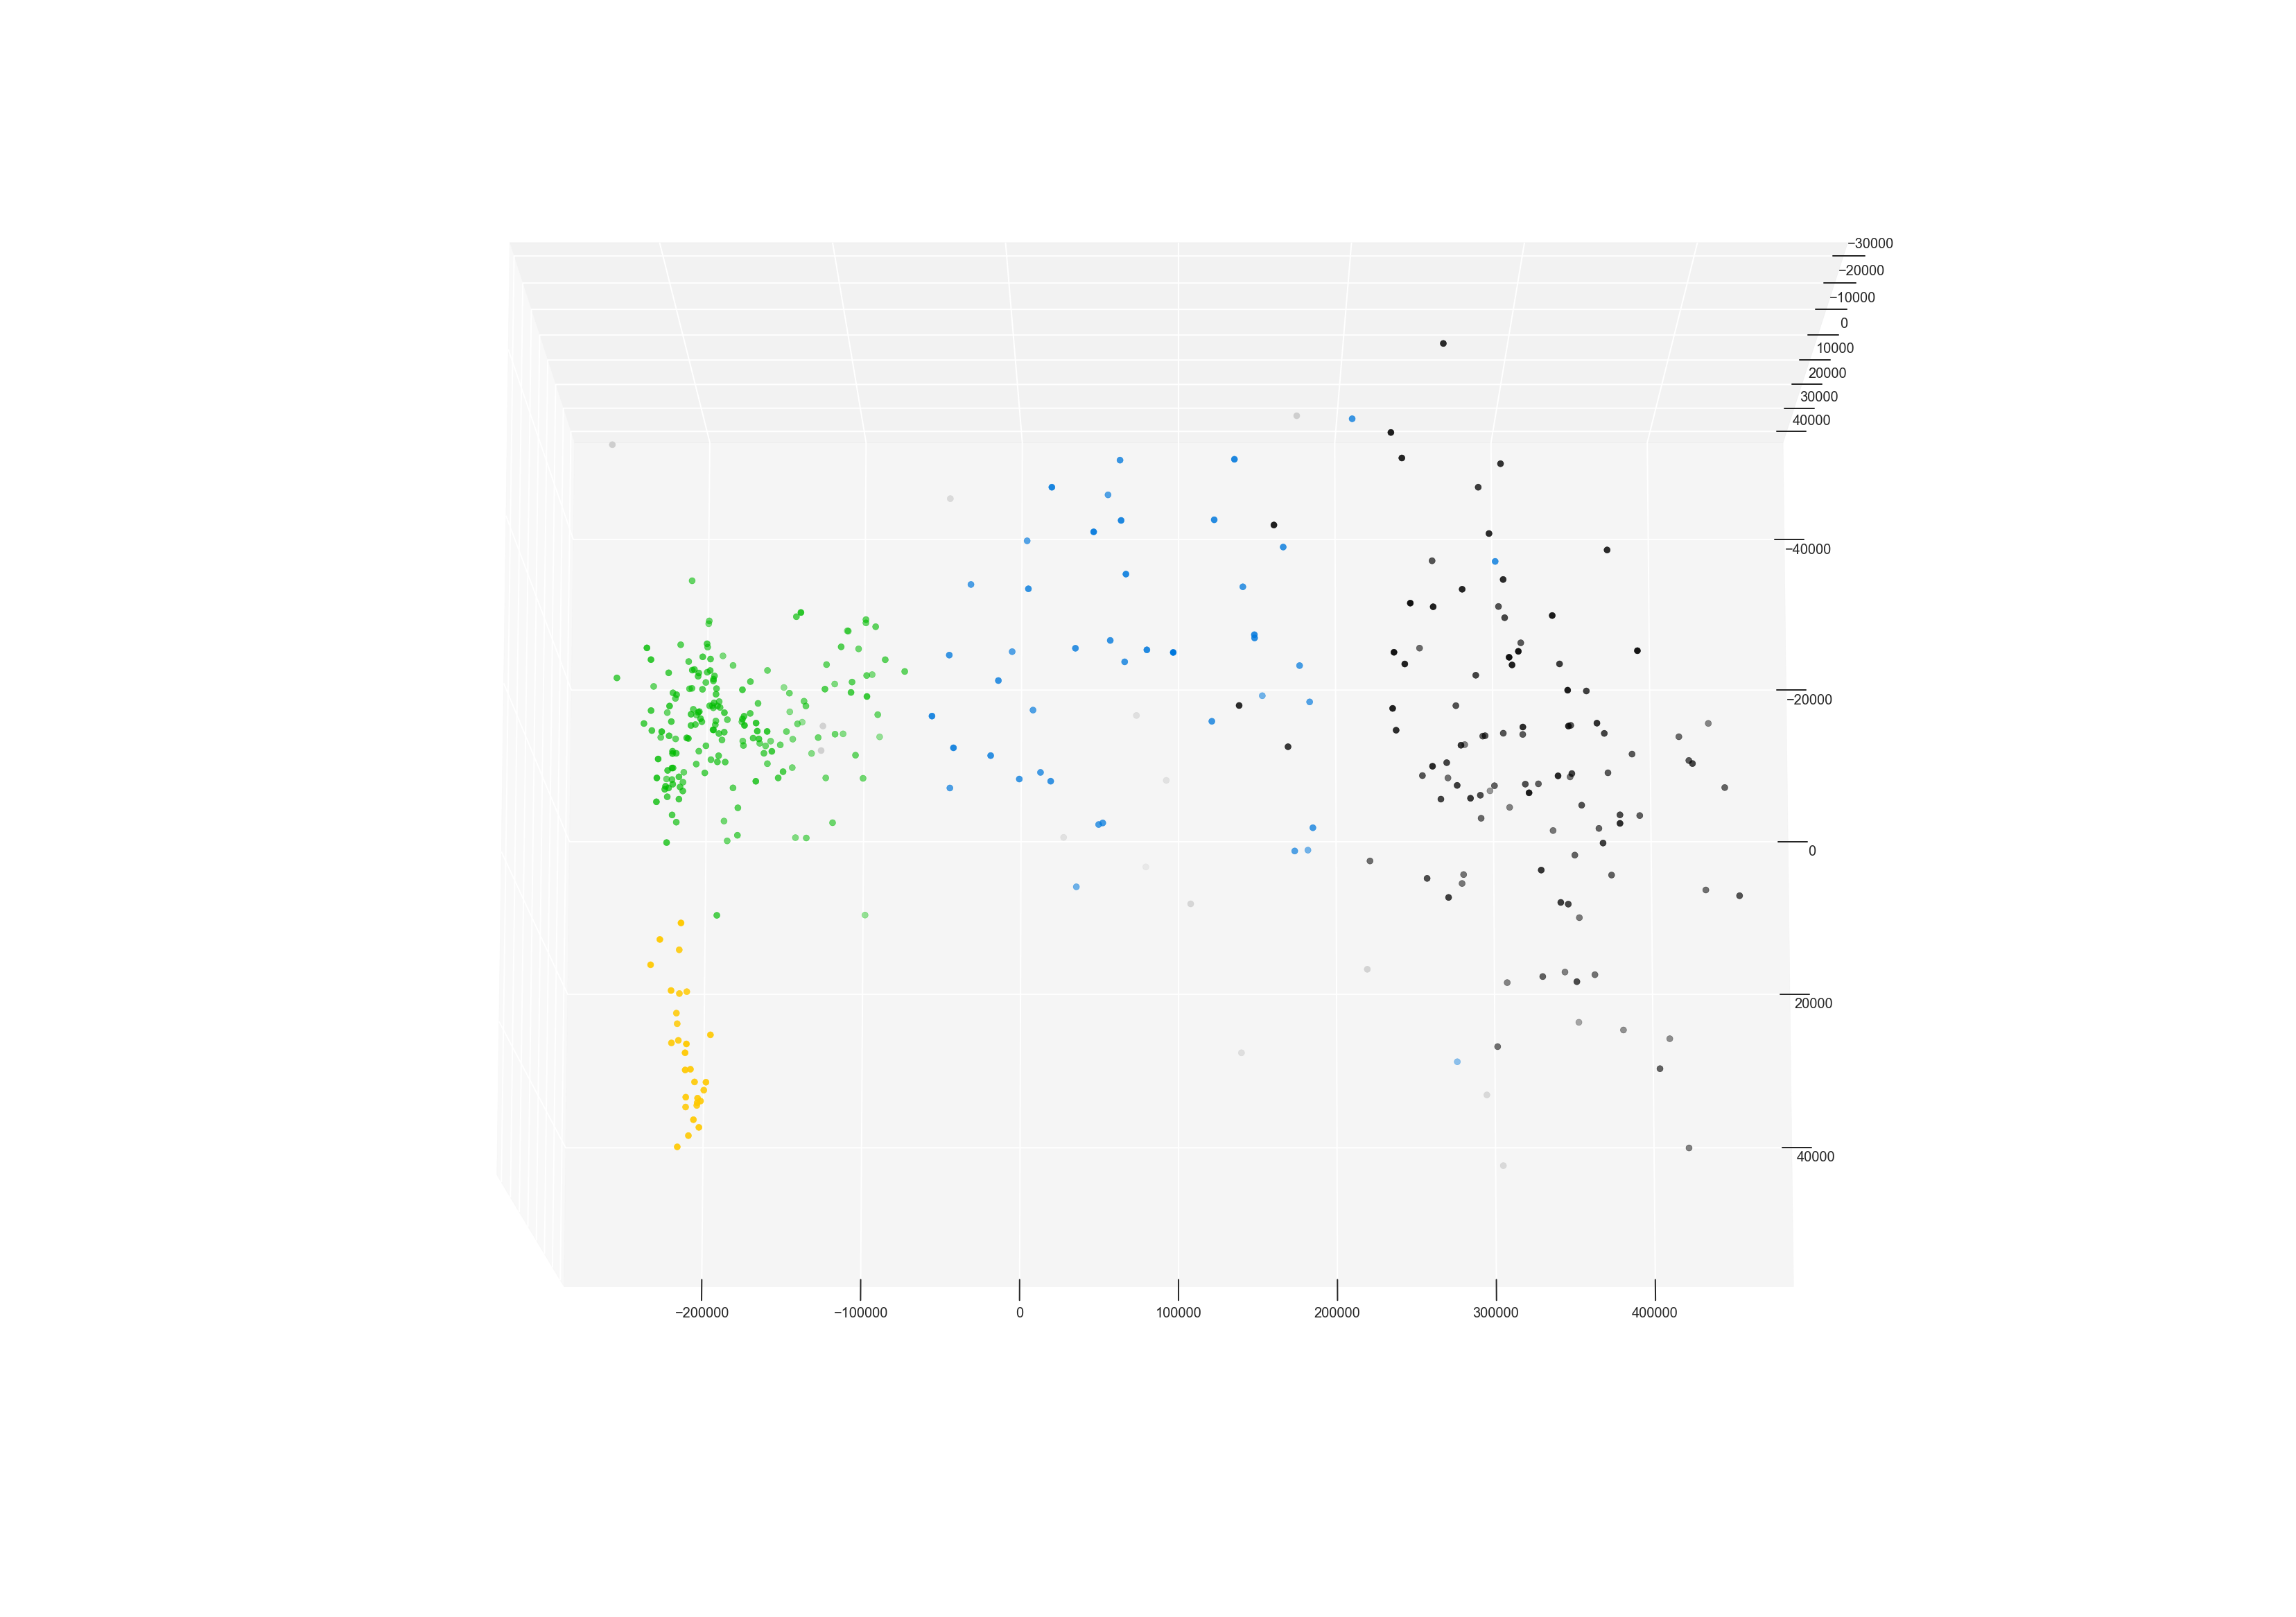

In [116]:
temp2=np.loadtxt('../data/Mixed_4_Clusters',delimiter=',')
# np.place(temp2,temp2==4,2)
# np.place(temp2,temp2==5,4)


print(temp2)

fig = plt.figure(1, figsize=(24,16))


ax3 = Axes3D(fig, rect=[0, 0, .95, 1], elev=280, azim=90,facecolor='white')


ax3.scatter(data_pca[:,0],data_pca[:,1],data_pca[:,2],cmap=plt.cm.spectral,c=temp2)

plt.show()

# np.savetxt('../data/Mixed_4_Clusters',temp2,delimiter=',')